In [1]:
import pandas as pd
import numpy as np
from WindPy import w
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [2]:
def stock_data(stockList, factor, startDate, endDate):
    data = w.wsd(stockList, factor, startDate, endDate, "")
    df = pd.DataFrame(data.Data, columns = data.Times, index = stockList).T
    return df

## 数据初始设置

In [184]:
stockList = ["000300.SH","000016.SH","000905.SH","399006.SZ","399005.SZ","881001.WI","000001.SH"]
startDate = "20060101"
endDate = "20210101"
N = 1 # N-month return of index

## 对所选指数的PE取倒数

In [185]:
stockPEdf = stock_data(stockList, "pe_ttm", startDate, endDate)
bond10y = w.edb("M1001654", startDate, endDate)
bonddf = pd.DataFrame(bond10y.Data,columns = bond10y.Times, index = ["bond10y"]).T/100
merged_data = pd.concat([1/stockPEdf,bonddf],axis = 1,join = 'inner')

In [186]:
#pd.set_option('display.max_rows', None)

## 7种指数与十年国债的收益情况
            沪深300    上证50    中证500  创业板指   中小板指   万得全A   上证指数  十年国债

In [187]:
merged_data

,000300.SH,000016.SH,000905.SH,881001.WI,000001.SH,bond10y
2007-12-14,0.024080,0.024660,0.015646,0.021808,0.022388,0.045473
2007-12-17,0.024810,0.025504,0.015633,0.022389,0.022963,0.045650
2007-12-18,0.025011,0.025744,0.015756,0.022534,0.023113,0.045516
2007-12-19,0.024469,0.025193,0.015414,0.022040,0.022613,0.045359
2007-12-20,0.023971,0.024661,0.015213,0.021621,0.022182,0.045438
...,...,...,...,...,...,...
2020-12-25,0.063846,0.072403,0.035907,0.043876,0.063488,0.031903
2020-12-28,0.063634,0.072281,0.036108,0.043890,0.063443,0.031729
2020-12-29,0.063903,0.072340,0.036358,0.044133,0.063748,0.031529
2020-12-30,0.063217,0.071556,0.035994,0.043606,0.063146,0.031359


## 7种指数与十年国债的收益比

In [188]:
returnRatio = pd.DataFrame(index = stockList,columns = merged_data.index).T
for i in stockList:
    returnRatio[i] = merged_data[i].T / merged_data[merged_data.columns[-1]].T
returnRatio = np.around(returnRatio, decimals = 2, out = None)

            沪深300   上证50   中证500   创业板指  中小板指  万得全A   上证指数

In [189]:
returnRatio

,000300.SH,000016.SH,000905.SH,881001.WI,000001.SH
2007-12-14,0.53,0.54,0.34,0.48,0.49
2007-12-17,0.54,0.56,0.34,0.49,0.50
2007-12-18,0.55,0.57,0.35,0.50,0.51
2007-12-19,0.54,0.56,0.34,0.49,0.50
2007-12-20,0.53,0.54,0.33,0.48,0.49
...,...,...,...,...,...
2020-12-25,2.00,2.27,1.13,1.38,1.99
2020-12-28,2.01,2.28,1.14,1.38,2.00
2020-12-29,2.03,2.29,1.15,1.40,2.02
2020-12-30,2.02,2.28,1.15,1.39,2.01


## 七种指数  $ log \frac{P_{t+T}}{P_t} $  计算N月收益涨跌 (一年约250个交易日 250/N）

In [168]:
def calculateReturn(N,stockList,factor,startDate, endDate):
    stockClosedf = stock_data(stockList, factor, startDate, endDate)
    days = round(250/12 * N)
    upAndDown = np.log(stockClosedf.shift(-days)/stockClosedf).fillna(value = 0)
    upAndDown = np.around(upAndDown, decimals = 4, out = None)
    
    #make sure indexes of both returnRatio and upAndDown are same
    #Caution:  some possible bugs here when len(returnRatio) > len(upAndDown) !!!!!!
    for i in range(0,min(len(returnRatio), len(upAndDown))):
        if returnRatio.index[i] != upAndDown.index[i]:
            upAndDown.drop(upAndDown.index[i],inplace = True)
    
    return upAndDown

In [169]:
calculateReturn(N,stockList, "CLOSE", startDate, endDate)

,000300.SH,000016.SH,000905.SH,399006.SZ,399005.SZ,881001.WI,000001.SH
2015-01-05,-0.0577,-0.0966,0.0522,0.1784,0.1021,0.0045,-0.0444
2015-01-06,-0.0680,-0.1028,0.0365,0.1324,0.0774,-0.0091,-0.0544
2015-01-07,-0.0790,-0.1150,0.0298,0.1525,0.0827,-0.0170,-0.0730
2015-01-08,-0.0719,-0.0954,0.0165,0.1157,0.0600,-0.0210,-0.0683
2015-01-09,-0.0583,-0.0820,0.0176,0.0955,0.0563,-0.0143,-0.0597
...,...,...,...,...,...,...,...
2020-12-25,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-12-28,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-12-29,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-12-30,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


## 七种指数涨跌，0代表跌，1代表涨

In [11]:
upAndDown = calculateReturn(N,stockList, "CLOSE", startDate, endDate)

In [12]:
def representation(upAndDown):
    y = pd.DataFrame(index = upAndDown.columns,columns = upAndDown.index).T
    for i in range(0,len(upAndDown)):
        for j in range(0,len(upAndDown.iloc[i])):
            if upAndDown.iloc[i][j] > 0:
                y.iloc[i][j] = 1
            else:
                y.iloc[i][j] = 0
    return y

In [13]:
Y_representation = representation(upAndDown)

In [14]:
Y_representation

,000300.SH,000016.SH,000905.SH,399006.SZ,399005.SZ,881001.WI,000001.SH
2011-01-04,0,0,0,0,0,0,0
2011-01-05,0,0,0,0,0,0,0
2011-01-06,0,0,0,0,0,0,1
2011-01-07,1,1,0,0,0,1,1
2011-01-10,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...
2020-12-25,0,0,0,0,0,0,0
2020-12-28,0,0,0,0,0,0,0
2020-12-29,0,0,0,0,0,0,0
2020-12-30,0,0,0,0,0,0,0


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [16]:
import random
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color

## 多项式回归分析

In [17]:
def Polynomial(returnRatio,upAndDown,m):
    poly = PolynomialFeatures(degree = 10)
    X = returnRatio.iloc[:,m:m+1].values
    X_transformed = poly.fit_transform(X)
    Y = upAndDown.iloc[:,m].values
    lin = LinearRegression()
    lin.fit(X_transformed,Y)
    Y_prediction = lin.predict(X_transformed)
    return [X,Y,Y_prediction]

## 基于股债比预测未来一个月的月收益率

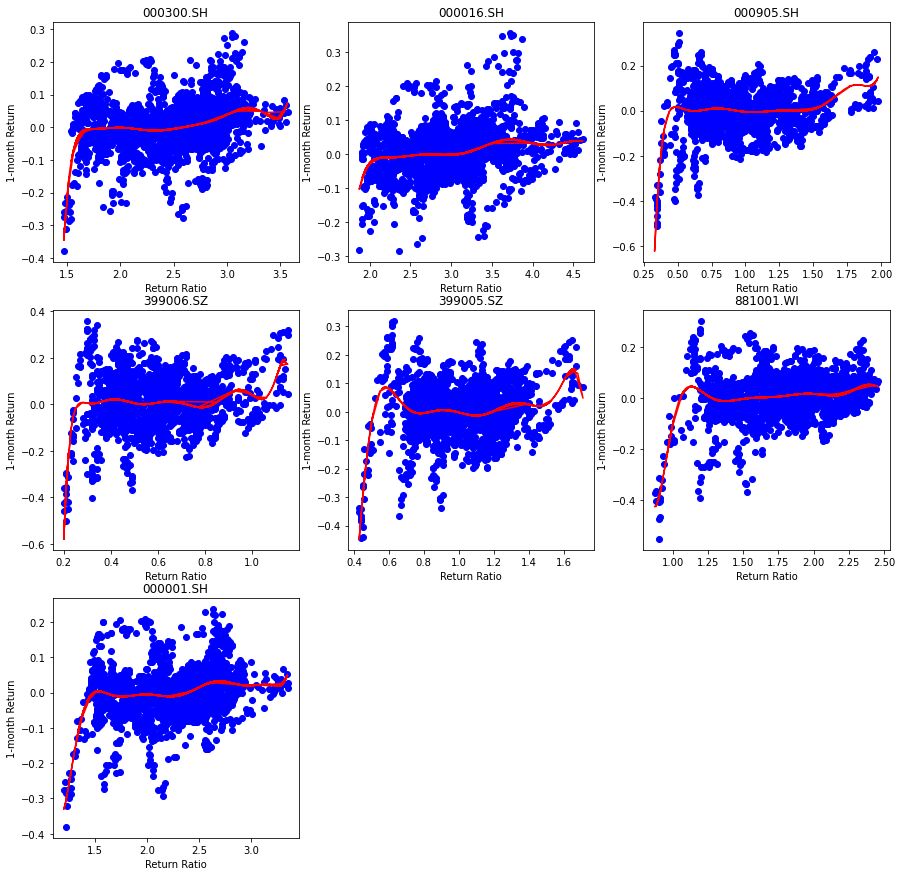

In [18]:
plt.figure(figsize=(15,15))
N = 1
upAndDown = calculateReturn(N,stockList, "CLOSE", startDate, endDate)
for i in range(len(stockList)):
    a = Polynomial(returnRatio,upAndDown,i)
    plt.subplot(331+i)
    plt.scatter(a[0],a[1],color = 'blue')
    plt.plot(a[0],a[2],color = 'red')
    plt.title(stockList[i])
    plt.xlabel('Return Ratio') 
    plt.ylabel(str(N)+'-month Return') 

## 基于股债比预测未来一个季度的季度收益率

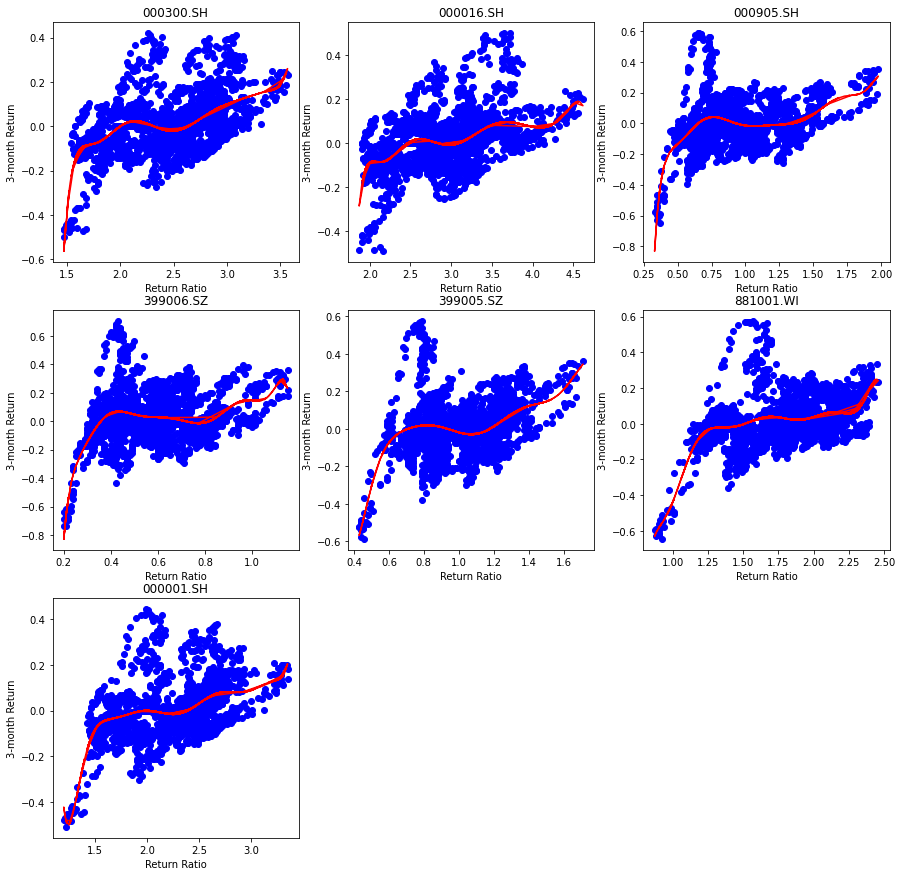

In [19]:
plt.figure(figsize=(15,15))
N = 3
upAndDown = calculateReturn(N,stockList, "CLOSE", startDate, endDate)
for i in range(len(stockList)):
    a = Polynomial(returnRatio,upAndDown,i)
    plt.subplot(331+i)
    plt.scatter(a[0],a[1],color = 'blue')
    plt.plot(a[0],a[2],color = 'red')
    plt.title(stockList[i])
    plt.xlabel('Return Ratio') 
    plt.ylabel(str(N)+'-month Return') 

## 基于股债比预测未来半年的半年收益率

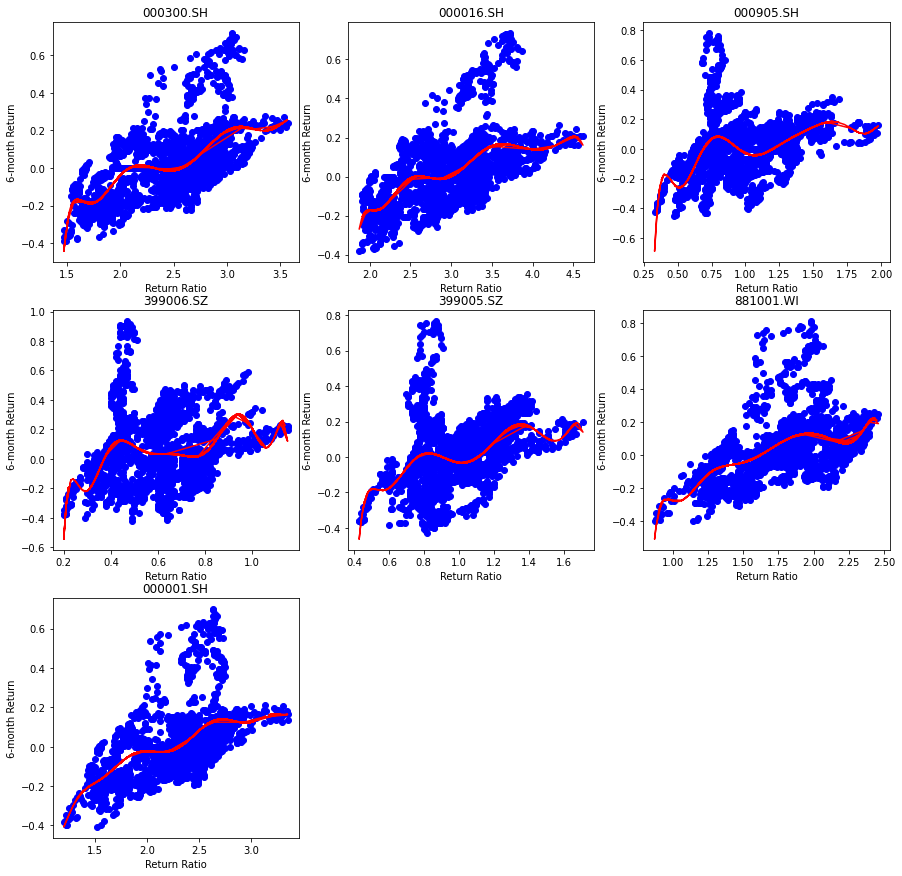

In [20]:
plt.figure(figsize=(15,15))
N = 6
upAndDown = calculateReturn(N,stockList, "CLOSE", startDate, endDate)
for i in range(len(stockList)):
    a = Polynomial(returnRatio,upAndDown,i)
    plt.subplot(331+i)
    plt.scatter(a[0],a[1],color = 'blue')
    plt.plot(a[0],a[2],color = 'red')
    plt.title(stockList[i])
    plt.xlabel('Return Ratio') 
    plt.ylabel(str(N)+'-month Return') 

## 基于股债比预测未来一年的年收益率

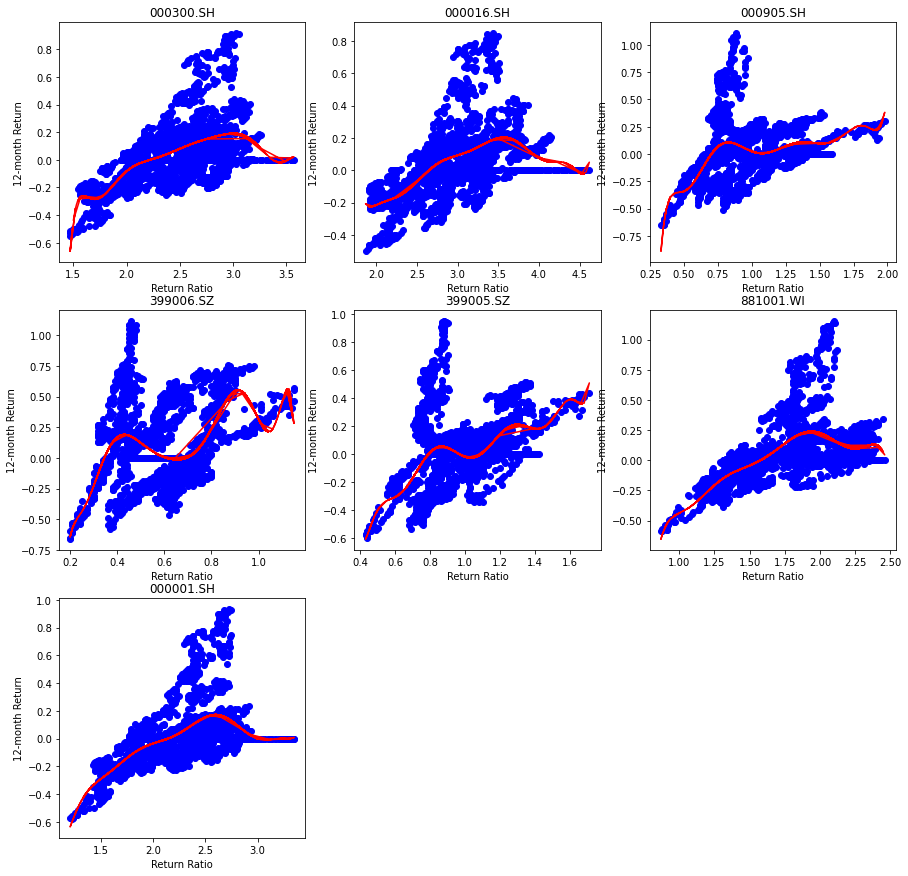

In [21]:
plt.figure(figsize=(15,15))
N = 12
upAndDown = calculateReturn(N,stockList, "CLOSE", startDate, endDate)
for i in range(len(stockList)):
    a = Polynomial(returnRatio,upAndDown,i)
    plt.subplot(331+i)
    plt.scatter(a[0],a[1],color = 'blue')
    plt.plot(a[0],a[2],color = 'red')
    plt.title(stockList[i])
    plt.xlabel('Return Ratio') 
    plt.ylabel(str(N)+'-month Return') 

Text(0, 0.5, '12-month Return')

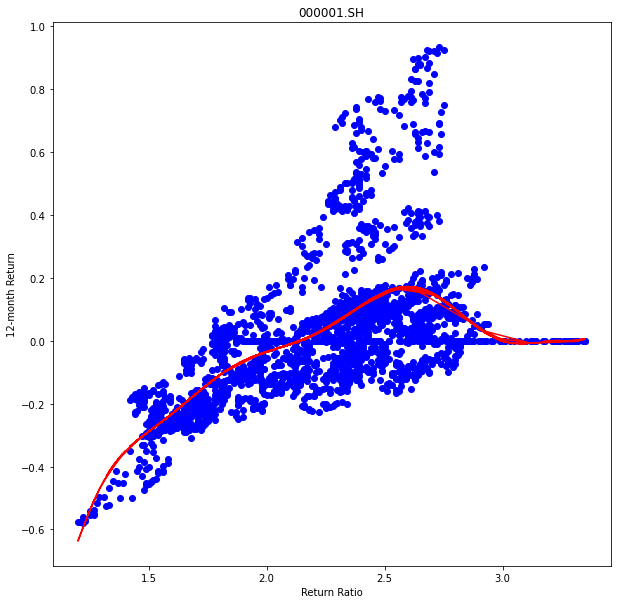

In [22]:
i = 6
N = 12
upAndDown = calculateReturn(N,stockList, "CLOSE", startDate, endDate)
a = Polynomial(returnRatio,upAndDown,i)
plt.figure(figsize=(10,10))
plt.scatter(a[0],a[1],color = 'blue')
plt.plot(a[0],a[2],color = 'red')
plt.title(stockList[i])
plt.xlabel('Return Ratio') 
plt.ylabel(str(N)+'-month Return') 

## 历史每个股债比N个月后指数涨跌概率

In [23]:
def getListAll(returnRatio, upAndDown, Y_representation, m):
    listAll = []
    a = Polynomial(returnRatio,upAndDown,m)
    for i in np.arange(min(a[0]),max(a[0])+0.01, 0.01):
        i = np.around(i, decimals = 2, out = None)
        list_temp = [i]
        for j in range(0,len(a[0])):
            if a[0][j][0] == i:
                list_temp.append(Y_representation.iloc[:,m].values[j])
        listAll.append(list_temp)    
    return listAll

In [24]:
def getStatAll(listAll):
    statAll = []
    X_plt = []
    Y_plt = []
    for i in listAll:
        stat_temp = [i[0]]
        count0 = 0
        count1 = 0
        for j in i[1:]:
            if j == 0:
                count0+=1
            else:
                count1+=1
        count = count0 + count1
        if count!=0:
            probability_up = count1/count
            stat_temp.append(probability_up)
        else:
            stat_temp.append(statAll[listAll.index(stat_temp)-1][1])
        X_plt.append(np.float(stat_temp[0]))
        Y_plt.append(stat_temp[1])
        statAll.append(stat_temp)
    return [X_plt,Y_plt,statAll]

## 历史每个股债比1个月后指数涨跌概率

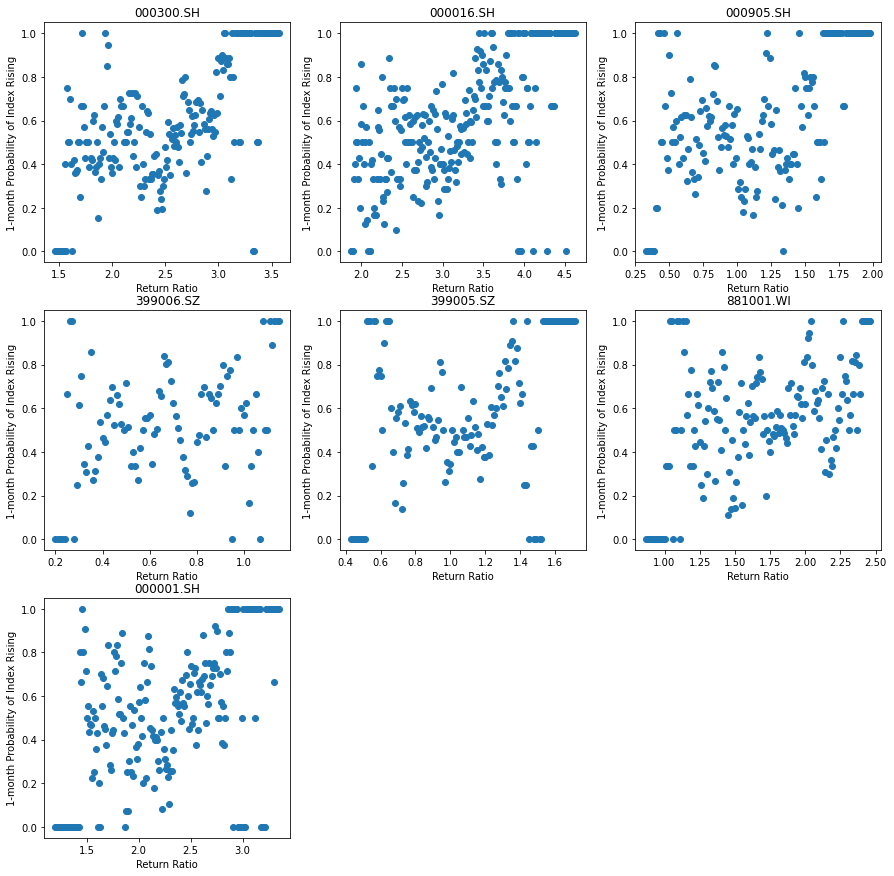

In [25]:
plt.figure(figsize=(15,15))
N = 1
upAndDown = calculateReturn(N,stockList, "CLOSE", startDate, endDate)
Y_representation = representation(upAndDown)
for i in range(len(stockList)):
    listAll = getListAll(returnRatio, upAndDown, Y_representation, i)
    a = getStatAll(listAll)
    plt.subplot(331+i)
    plt.plot(a[0],a[1],'o')
    plt.title(stockList[i])
    plt.xlabel('Return Ratio') 
    plt.ylabel(str(N)+'-month Probability of Index Rising') 

## 历史每个股债比3个月后指数涨跌概率

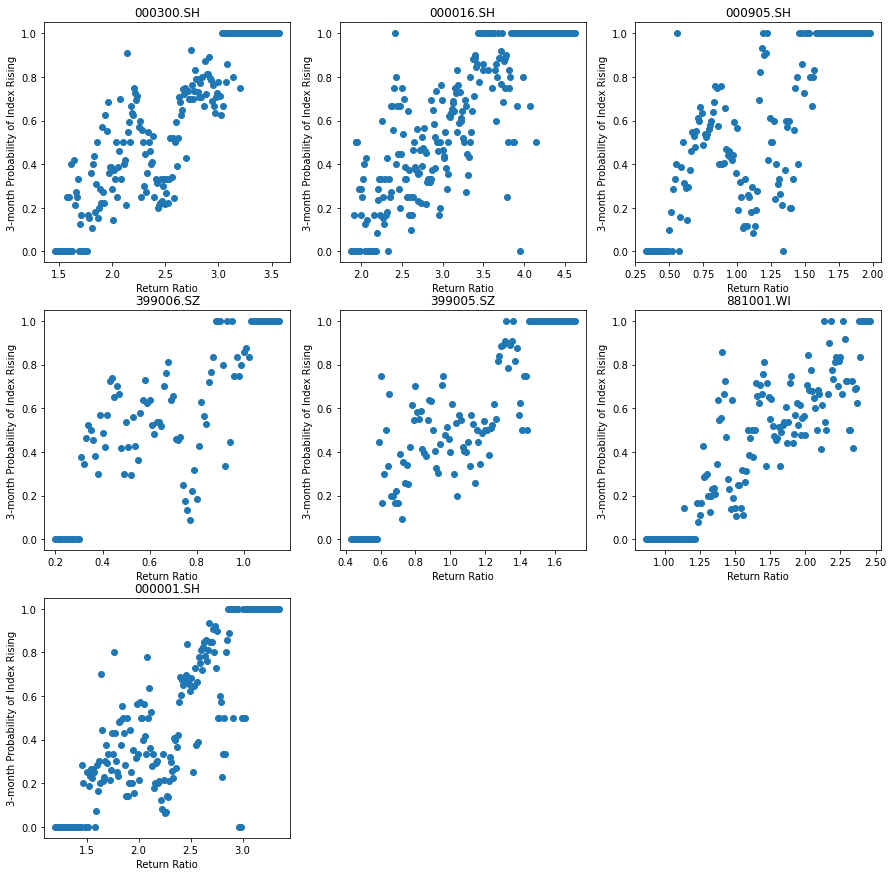

In [26]:
plt.figure(figsize=(15,15))
N = 3
upAndDown = calculateReturn(N,stockList, "CLOSE", startDate, endDate)
Y_representation = representation(upAndDown)
for i in range(len(stockList)):
    listAll = getListAll(returnRatio, upAndDown, Y_representation, i)
    a = getStatAll(listAll)
    plt.subplot(331+i)
    plt.plot(a[0],a[1],'o')
    plt.title(stockList[i])
    plt.xlabel('Return Ratio') 
    plt.ylabel(str(N)+'-month Probability of Index Rising') 

## 历史每个股债比6个月后指数涨跌概率

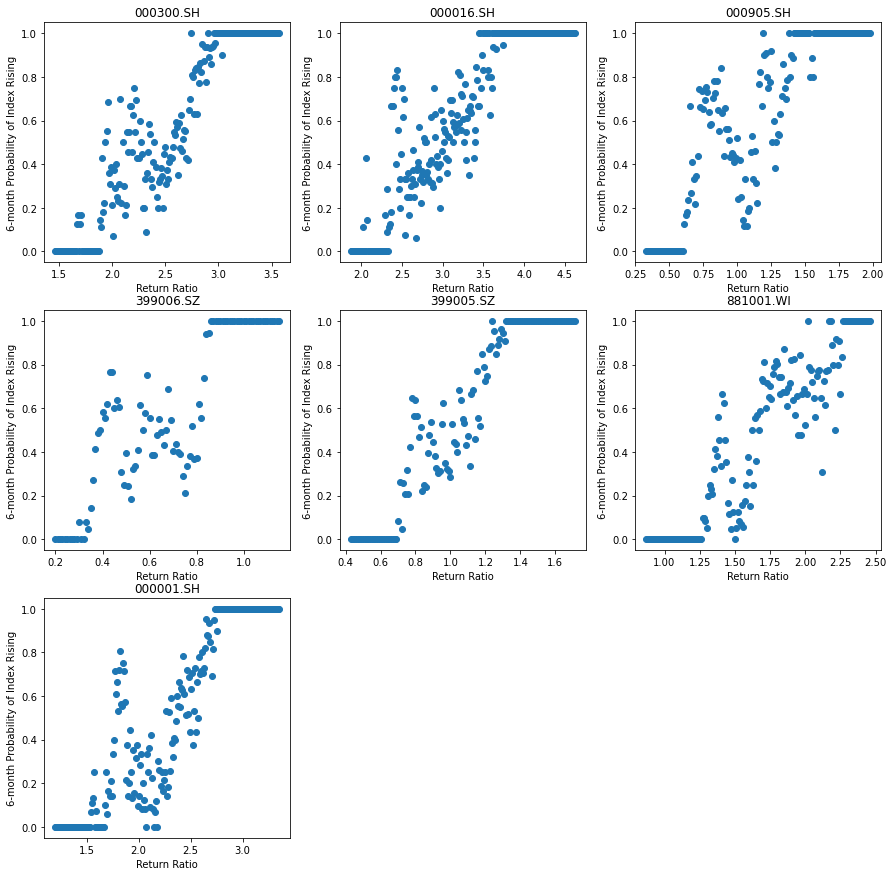

In [27]:
plt.figure(figsize=(15,15))
N = 6
upAndDown = calculateReturn(N,stockList, "CLOSE", startDate, endDate)
Y_representation = representation(upAndDown)
for i in range(len(stockList)):
    listAll = getListAll(returnRatio, upAndDown, Y_representation, i)
    a = getStatAll(listAll)
    plt.subplot(331+i)
    plt.plot(a[0],a[1],'o')
    plt.title(stockList[i])
    plt.xlabel('Return Ratio') 
    plt.ylabel(str(N)+'-month Probability of Index Rising') 

Text(0, 0.5, '1-month Probability of Index Rising')

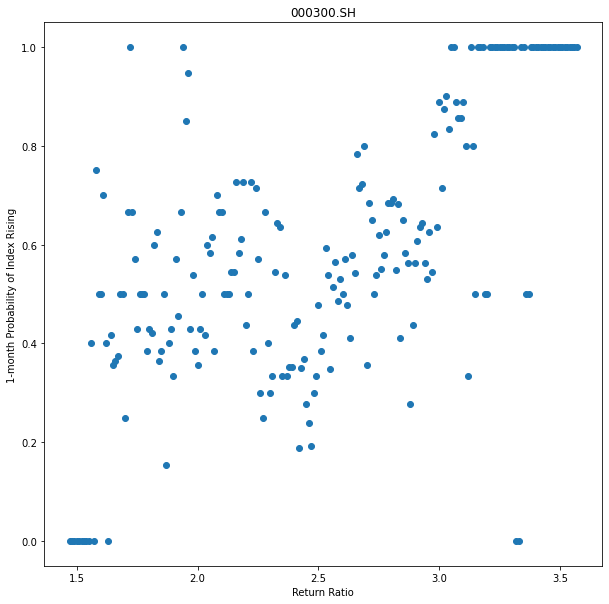

In [28]:
i = 0
N = 1
upAndDown = calculateReturn(N,stockList, "CLOSE", startDate, endDate)
Y_representation = representation(upAndDown)
listAll = getListAll(returnRatio, upAndDown, Y_representation, i)
a = getStatAll(listAll)
plt.figure(figsize=(10,10))
plt.plot(a[0],a[1],'o')
plt.title(stockList[i])
plt.xlabel('Return Ratio') 
plt.ylabel(str(N)+ '-month Probability of Index Rising') 

## 股债比重新排序并对应其所在百分位（打乱排序，不考虑时间顺序）

In [29]:
#pd.set_option('display.max_rows', None)

In [30]:
data_sorted = pd.DataFrame()
for i in returnRatio:
    ratio_sorted = pd.DataFrame(returnRatio[i].sort_values().values, columns = [i])
    percentile = pd.DataFrame(returnRatio[i].sort_values().rank(pct=True).values, columns = ['percentile'])
    data_sorted = pd.concat([data_sorted, pd.concat([ratio_sorted,percentile],axis = 1)], axis =1)

In [31]:
data_sorted

,000300.SH,percentile,000016.SH,percentile,000905.SH,percentile,399006.SZ,percentile,399005.SZ,percentile,881001.WI,percentile,000001.SH,percentile
0,1.47,0.000822,1.87,0.000411,0.33,0.000411,0.20,0.000822,0.43,0.000617,0.87,0.000411,1.20,0.000411
1,1.47,0.000822,1.90,0.000822,0.34,0.000822,0.20,0.000822,0.43,0.000617,0.88,0.001028,1.21,0.000822
2,1.47,0.000822,1.91,0.002262,0.35,0.002673,0.20,0.000822,0.44,0.002262,0.88,0.001028,1.22,0.001439
3,1.48,0.001645,1.91,0.002262,0.35,0.002673,0.21,0.002878,0.44,0.002262,0.90,0.002262,1.22,0.001439
4,1.49,0.002262,1.91,0.002262,0.35,0.002673,0.21,0.002878,0.44,0.002262,0.90,0.002262,1.23,0.002262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,3.54,0.998561,4.53,0.998355,1.94,0.998150,1.13,0.997533,1.66,0.998150,2.42,0.998355,3.31,0.998355
2428,3.54,0.998561,4.56,0.998972,1.95,0.998972,1.14,0.998766,1.67,0.998972,2.43,0.998766,3.32,0.998766
2429,3.56,0.999383,4.56,0.998972,1.95,0.998972,1.15,0.999589,1.67,0.998972,2.44,0.999178,3.34,0.999178
2430,3.56,0.999383,4.58,0.999589,1.97,0.999589,1.15,0.999589,1.68,0.999589,2.45,0.999589,3.35,0.999794


## 十个股债比区间按如下配置比进行回测

In [76]:
weights_original = np.around([i for i in np.arange(0.1,1.1,0.1)],decimals = 2)

In [77]:
weights_original

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [190]:
dailyReturnOfBond = 0.04/365
stockClosedf = stock_data(stockList, 'CLOSE', startDate, endDate)
N_sect = 10

In [85]:
def weight_stock(m, ratio, weights):
    bins = [i+(max(m)-min(m))/N_sect for i in np.arange(min(m),max(m),(max(m)-min(m))/N_sect)][:-1]
    bins.append(ratio)
    bins.sort()
    index = bins.index(ratio)
    return np.around(weights[index],decimals =2)

In [53]:
def updateMoney(t,t_lasttime,weights,money):
    bondIncome = (t-t_lasttime).days * dailyReturnOfBond * (1-weights) * money
    stockIncome = (stockClose[t]-stockClose[t_lasttime])/stockClose[t_lasttime] * weights * money
    money += (stockIncome + bondIncome)
    return money

## 11年开始 按照股债比变化超过区间边界进行调仓

In [135]:
for stock in returnRatio:
    m = returnRatio[stock]
    stockClose = stockClosedf[stock]
    weights_assigned = [i for i in np.arange(0.1,1.1,0.1)]
    
    weights_new = weights_lasttime = weight_stock(m,m[0],weights_assigned)
    t = t_lasttime = m.index[0]
    money = 1
    
    for i in range(1,len(m)):     
        weights_new = weight_stock(m,m[i],weights_assigned)
#         if i%21 == 0:
        if weights_new != weights_lasttime:
            t = m.index[i]
            money = updateMoney(t,t_lasttime, weights_lasttime,money)
            weights_lasttime = weights_new
            t_lasttime = t
    print(stock)
    print("指数总收益率： " + str(stockClose[-1]/stockClose[0] - 1) + "   指数年化收益率： " + str((stockClose[-1]/stockClose[0])**0.1 - 1))
    print("策略总收益率： " + str(money - 1) + "   策略年化收益率： " + str(money**0.1 - 1))

000300.SH
指数总收益率： 0.6337956260216535   指数年化收益率： 0.050315495849283964
策略总收益率： 1.3459315486380108   策略年化收益率： 0.08900916205621567
000016.SH
指数总收益率： 0.8066682645927372   指数年化收益率： 0.06093271509717413
策略总收益率： 1.351890775169474   策略年化收益率： 0.08928548068273234
000905.SH
指数总收益率： 0.2705013351297356   指数年化收益率： 0.024230047824678635
策略总收益率： 0.8839136821764739   策略年化收益率： 0.06538382776011731
399006.SZ
指数总收益率： 1.5679515992471686   指数年化收益率： 0.09890129047171992
策略总收益率： 1.5095448943277274   策略年化收益率： 0.09637594143665251
399005.SZ
指数总收益率： 0.3840102117545663   指数年化收益率： 0.0330323679329132
策略总收益率： 0.8641412200439929   策略年化收益率： 0.06426034647153145
881001.WI
指数总收益率： 0.9498547371441743   指数年化收益率： 0.0690554350308874
策略总收益率： 1.6750293457061014   策略年化收益率： 0.10339968355411489
000001.SH
指数总收益率： 0.2174896096539074   指数年化收益率： 0.01987401419998469
策略总收益率： 0.8159057526092204   策略年化收益率： 0.061473925515113104


## 按照每过21个交易日进行调仓（若股债比区间未变，则前后仓位不变）

In [94]:
for stock in returnRatio:
    m = returnRatio[stock]
    stockClose = stockClosedf[stock]
    weights_assigned = [i for i in np.arange(0.1,1.1,0.1)]
    
    weights_new = weights_lasttime = weight_stock(m,m[0],weights_assigned)
    t = t_lasttime = m.index[0]
    money = 1
    
    for i in range(1,len(m)):     
        weights_new = weight_stock(m,m[i],weights_assigned)
        if i%21 == 0:
#         if weights_new != weights_lasttime:
            t = m.index[i]
            money = updateMoney(t,t_lasttime, weights_lasttime,money)
            weights_lasttime = weights_new
            t_lasttime = t
    print(stock)
    print("指数总收益率： " + str(stockClose[-1]/stockClose[0] - 1) + "   指数年化收益率： " + str((stockClose[-1]/stockClose[0])**0.1 - 1))
    print("策略总收益率： " + str(money - 1) + "   策略年化收益率： " + str(money**0.1 - 1))

000300.SH
指数总收益率： 0.6337956260216535   指数年化收益率： 0.050315495849283964
策略总收益率： 1.3982319923271258   策略年化收益率： 0.09141299191910002
000016.SH
指数总收益率： 0.8066682645927372   指数年化收益率： 0.06093271509717413
策略总收益率： 1.4058087439463836   策略年化收益率： 0.09175731357733352
000905.SH
指数总收益率： 0.2705013351297356   指数年化收益率： 0.024230047824678635
策略总收益率： 0.9950544794632068   策略年化收益率： 0.0715081432868947
399006.SZ
指数总收益率： 1.5679515992471686   指数年化收益率： 0.09890129047171992
策略总收益率： 1.8053374785670542   策略年化收益率： 0.10866033885065196
399005.SZ
指数总收益率： 0.3840102117545663   指数年化收益率： 0.0330323679329132
策略总收益率： 0.9189865452855421   策略年化收益率： 0.06735083204616044
881001.WI
指数总收益率： 0.9498547371441743   指数年化收益率： 0.0690554350308874
策略总收益率： 1.81059997465848   策略年化收益率： 0.10886813565053477
000001.SH
指数总收益率： 0.2174896096539074   指数年化收益率： 0.01987401419998469
策略总收益率： 0.9640053823337131   策略年化收益率： 0.06982875653283616


## 06年-20年底 

In [191]:
for stock in returnRatio:
    m = returnRatio[stock]
    stockClose = stockClosedf[stock]
    weights_assigned = [i for i in np.arange(0.1,1.1,0.1)]
    
    weights_new = weights_lasttime = weight_stock(m,m[0],weights_assigned)
    t = t_lasttime = m.index[0]
    money = 1
    
    for i in range(1,len(m)):     
        weights_new = weight_stock(m,m[i],weights_assigned)
#         if i%21 == 0:
        if weights_new != weights_lasttime:
            t = m.index[i]
            money = updateMoney(t,t_lasttime, weights_lasttime,money)
            weights_lasttime = weights_new
            t_lasttime = t
    print(stock)
    print("指数总收益率： " + str(stockClose[-1]/stockClose[0] - 1) + "   指数年化收益率： " + str((stockClose[-1]/stockClose[0])**(1/6) - 1))
    print("策略总收益率： " + str(money - 1) + "   策略年化收益率： " + str(money**(1/6) - 1))

000300.SH
指数总收益率： 4.53551466495579   指数年化收益率： 0.33002458132434165
策略总收益率： 1.5861336976596827   策略年化收益率： 0.17158866750953816
000016.SH
指数总收益率： 3.4802514653635193   指数年化收益率： 0.2839567607240605
策略总收益率： 1.22892086673715   策略年化收益率： 0.14291984864176754
000905.SH
指数总收益率： 6.303998829912931   指数年化收益率： 0.39292195107522665
策略总收益率： 1.4769088608983973   策略年化收益率： 0.16319270848442247
881001.WI
指数总收益率： 6.807386308167739   指数年化收益率： 0.40848084410517815
策略总收益率： 2.326363702124845   策略年化收益率： 0.22178546852692027
000001.SH
指数总收益率： 1.9408790114508245   指数年化收益率： 0.19695969383739365
策略总收益率： 0.9196308857066979   策略年化收益率： 0.11481538820641624


In [192]:
for stock in returnRatio:
    m = returnRatio[stock]
    stockClose = stockClosedf[stock]
    weights_assigned = [i for i in np.arange(0.1,1.1,0.1)]
    
    weights_new = weights_lasttime = weight_stock(m,m[0],weights_assigned)
    t = t_lasttime = m.index[0]
    money = 1
    
    for i in range(1,len(m)):     
        weights_new = weight_stock(m,m[i],weights_assigned)
        if i%21 == 0:
#         if weights_new != weights_lasttime:
            t = m.index[i]
            money = updateMoney(t,t_lasttime, weights_lasttime,money)
            weights_lasttime = weights_new
            t_lasttime = t
    print(stock)
    print("指数总收益率： " + str(stockClose[-1]/stockClose[0] - 1) + "   指数年化收益率： " + str((stockClose[-1]/stockClose[0])**(1/6) - 1))
    print("策略总收益率： " + str(money - 1) + "   策略年化收益率： " + str(money**(1/6) - 1))

000300.SH
指数总收益率： 4.53551466495579   指数年化收益率： 0.33002458132434165
策略总收益率： 1.869123385596875   策略年化收益率： 0.19204194536990182
000016.SH
指数总收益率： 3.4802514653635193   指数年化收益率： 0.2839567607240605
策略总收益率： 1.615624397901584   策略年化收益率： 0.1738048418665441
000905.SH
指数总收益率： 6.303998829912931   指数年化收益率： 0.39292195107522665
策略总收益率： 1.8700894116883915   策略年化收益率： 0.19210882887107528
881001.WI
指数总收益率： 6.807386308167739   指数年化收益率： 0.40848084410517815
策略总收益率： 2.804402085375354   策略年化收益率： 0.24943711258515977
000001.SH
指数总收益率： 1.9408790114508245   指数年化收益率： 0.19695969383739365
策略总收益率： 1.097350871735531   策略年化收益率： 0.13138873040139898


## 15年-20年底

In [173]:
for stock in returnRatio:
    m = returnRatio[stock]
    stockClose = stockClosedf[stock]
    weights_assigned = [i for i in np.arange(0.1,1.1,0.1)]
    
    weights_new = weights_lasttime = weight_stock(m,m[0],weights_assigned)
    t = t_lasttime = m.index[0]
    money = 1
    
    for i in range(1,len(m)):     
        weights_new = weight_stock(m,m[i],weights_assigned)
#         if i%21 == 0:
        if weights_new != weights_lasttime:
            t = m.index[i]
            money = updateMoney(t,t_lasttime, weights_lasttime,money)
            weights_lasttime = weights_new
            t_lasttime = t
    print(stock)
    print("指数总收益率： " + str(stockClose[-1]/stockClose[0] - 1) + "   指数年化收益率： " + str((stockClose[-1]/stockClose[0])**(1/6) - 1))
    print("策略总收益率： " + str(money - 1) + "   策略年化收益率： " + str(money**(1/6) - 1))

000300.SH
指数总收益率： 0.43106682033787336   指数年化收益率： 0.06155700078482851
策略总收益率： 0.6942167768935763   策略年化收益率： 0.09184627388824707
000016.SH
指数总收益率： 0.37401317688937996   指数年化收益率： 0.054383213263984764
策略总收益率： 0.6657293448634942   策略年化收益率： 0.08876480299501543
000905.SH
指数总收益率： 0.17539134545821056   指数年化收益率： 0.027299511119674325
策略总收益率： 0.5548501845407416   策略年化收益率： 0.07633655839068054
399006.SZ
指数总收益率： 1.0250607260915339   指数年化收益率： 0.12479404529768612
策略总收益率： 0.7892359660691952   策略年化收益率： 0.1018215693776845
399005.SZ
指数总收益率： 0.7076122261611539   指数年化收益率： 0.09328035047370209
策略总收益率： 0.7041453152355703   策略年化收益率： 0.09291009506597336
881001.WI
指数总收益率： 0.48365146358595723   指数年化收益率： 0.06796080709849694
策略总收益率： 0.8866540143604837   策略年化收益率： 0.11160044168283734
000001.SH
指数总收益率： 0.03657651247463467   指数年化收益率： 0.00600520408792482
策略总收益率： 0.42108149478862944   策略年化收益率： 0.060318886953078854


In [174]:
for stock in returnRatio:
    m = returnRatio[stock]
    stockClose = stockClosedf[stock]
    weights_assigned = [i for i in np.arange(0.1,1.1,0.1)]
    
    weights_new = weights_lasttime = weight_stock(m,m[0],weights_assigned)
    t = t_lasttime = m.index[0]
    money = 1
    
    for i in range(1,len(m)):     
        weights_new = weight_stock(m,m[i],weights_assigned)
        if i%21 == 0:
#         if weights_new != weights_lasttime:
            t = m.index[i]
            money = updateMoney(t,t_lasttime, weights_lasttime,money)
            weights_lasttime = weights_new
            t_lasttime = t
    print(stock)
    print("指数总收益率： " + str(stockClose[-1]/stockClose[0] - 1) + "   指数年化收益率： " + str((stockClose[-1]/stockClose[0])**(1/6) - 1))
    print("策略总收益率： " + str(money - 1) + "   策略年化收益率： " + str(money**(1/6) - 1))

000300.SH
指数总收益率： 0.43106682033787336   指数年化收益率： 0.06155700078482851
策略总收益率： 0.6545714687061086   策略年化收益率： 0.08754588261480323
000016.SH
指数总收益率： 0.37401317688937996   指数年化收益率： 0.054383213263984764
策略总收益率： 0.6411086998030331   策略年化收益率： 0.08606601647508105
000905.SH
指数总收益率： 0.17539134545821056   指数年化收益率： 0.027299511119674325
策略总收益率： 0.4836174447278825   策略年化收益率： 0.06795672582164736
399006.SZ
指数总收益率： 1.0250607260915339   指数年化收益率： 0.12479404529768612
策略总收益率： 0.7545954390219938   策略年化收益率： 0.09823723987820654
399005.SZ
指数总收益率： 0.7076122261611539   指数年化收益率： 0.09328035047370209
策略总收益率： 0.7979861507269448   策略年化收益率： 0.1027178136606337
881001.WI
指数总收益率： 0.48365146358595723   指数年化收益率： 0.06796080709849694
策略总收益率： 0.8704049501319326   策略年化收益率： 0.10999905027515156
000001.SH
指数总收益率： 0.03657651247463467   指数年化收益率： 0.00600520408792482
策略总收益率： 0.42154973218436953   策略年化收益率： 0.06037710702565846


## 沪深三百按照股债比变化调仓

In [158]:
for stock in returnRatio:
    T = []
    weights_allocated = []
    
    m = returnRatio[stock]
    stockClose = stockClosedf[stock]
    weights_assigned = [i for i in np.arange(0.1,1.1,0.1)]
    
    weights_new = weights_lasttime = weight_stock(m,m[0],weights_assigned)
    weights_allocated.append(weights_new)
    t = t_lasttime = m.index[0]
    T.append(t)
    
    money = 1
    
    for i in range(1,len(m)):     
        weights_new = weight_stock(m,m[i],weights_assigned)
#         if i%21 == 0:
        if weights_new != weights_lasttime:
            t = m.index[i]
            T.append(t)
            weights_allocated.append(weights_new)
            money = updateMoney(t,t_lasttime, weights_lasttime,money)
            weights_lasttime = weights_new
            t_lasttime = t
            
    break

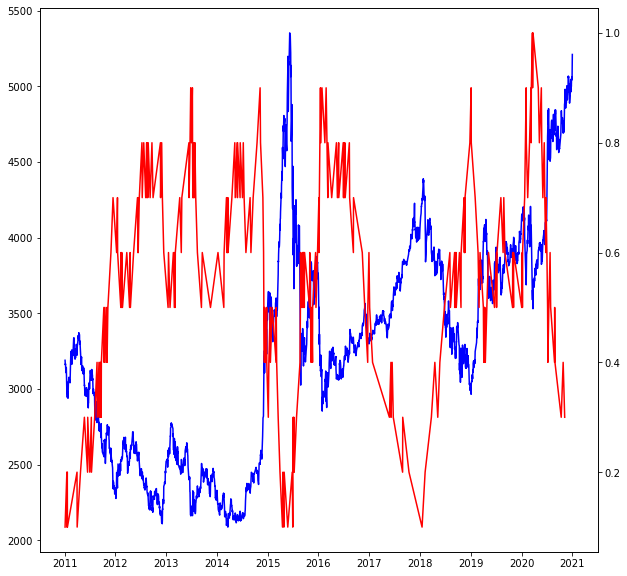

In [159]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.plot(stockClose,color = 'blue')
ax2 = ax1.twinx() 
ax2.plot(T,weights_allocated,color = 'red')

## 沪深300 按照21个交易日调仓

In [154]:
for stock in returnRatio:
    T = []
    weights_allocated = []
    
    m = returnRatio[stock]
    stockClose = stockClosedf[stock]
    weights_assigned = [i for i in np.arange(0.1,1.1,0.1)]
    
    weights_new = weights_lasttime = weight_stock(m,m[0],weights_assigned)
    weights_allocated.append(weights_new)
    t = t_lasttime = m.index[0]
    T.append(t)
    
    money = 1
    
    for i in range(1,len(m)):     
        weights_new = weight_stock(m,m[i],weights_assigned)
        if i%21 == 0:
#         if weights_new != weights_lasttime:
            t = m.index[i]
            T.append(t)
            weights_allocated.append(weights_new)
            money = updateMoney(t,t_lasttime, weights_lasttime,money)
            weights_lasttime = weights_new
            t_lasttime = t
            
    break

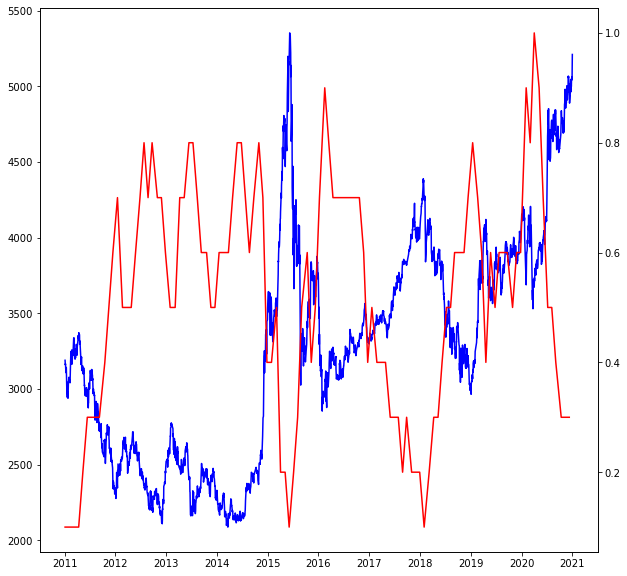

In [155]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.plot(stockClose,color = 'blue')
ax2 = ax1.twinx() 
ax2.plot(T,weights_allocated,color = 'red')

In [67]:
def model(weights_assigned):
    stock = returnRatio.columns[0]
    m = returnRatio[stock]
    stockClose = stockClosedf[stock]
    
    weights_new = weights_lasttime = weight_stock(m,m[0],weights_assigned)
    t = t_lasttime = m.index[0]
    money = 1
    
    for i in range(1,len(m)):     
        weights_new = weight_stock(m,m[i],weights_assigned)
    #     if i%21 == 0:
        if weights_new != weights_lasttime:
            t = m.index[i]
            money = updateMoney(t,t_lasttime, weights_lasttime,money)
            weights_lasttime = weights_new
            t_lasttime = t
    return money

In [125]:
def Model(weights_assigned):
    stock = returnRatio.columns[0]
    m = returnRatio[stock]
    stockClose = stockClosedf[stock]
    
    weights_new = weights_lasttime = weight_stock(m,m[0],weights_assigned)
    t = t_lasttime = m.index[0]
    money = 1
    
    for i in range(1,len(m)):     
        weights_new = weight_stock(m,m[i],weights_assigned)
        if i%21 == 0:
#         if weights_new != weights_lasttime:
            t = m.index[i]
            money = updateMoney(t,t_lasttime, weights_lasttime,money)
            weights_lasttime = weights_new
            t_lasttime = t
    return money

## 股债比十等分后，检测对应区间的最优配置比（如寻找股债比2.3时最优的股债配置比）

In [91]:
data_all = []
for k in range(10):
    data = []
    for i in np.arange(0.0,1.0,0.05):
        weights_test = weights_original
        weights_test[k] = i
        money = model(weights_test)
        data.append(money)
    print(data)
    data_all.append(data)

[2.387872294150782, 2.356511211608243, 2.3253467629709035, 2.294379910886014, 2.263611583852478, 2.2330426765785423, 2.202674050337308, 2.153477283959311, 2.142540920987772, 2.1127779764196712, 2.0832184306607475, 2.0538629830663395, 2.024712301644951, 1.9957670233988807, 1.9670277546627841, 1.9384950714401437, 1.910169519737648, 1.882051615897529, 1.854141846927789, 1.8264406708304344]
[1.8909351444521794, 1.8824723021549925, 1.873752610635377, 1.86477998171987, 1.855558395352457, 1.8460918976053422, 1.8363845986701361, 1.8264406708304344, 1.8162643464167298, 1.8058599157445983, 1.7952317250372052, 1.793203066868783, 1.7733217153798666, 1.762048849515937, 1.7505701255393469, 1.7388901375666348, 1.7270135228815027, 1.7149449597747783, 1.7026891653764484, 1.6871216557514153]
[1.65577079901977, 1.6594458452663703, 1.6629561923170386, 1.6663016676274063, 1.6694821361304062, 1.6724975000417366, 1.6753476986565354, 1.6780327081373918, 1.672363884178489, 1.682907247353421, 1.6850969117246037

In [130]:
Data_all = []
for k in range(10):
    data = []
    for i in np.arange(0.0,1.0,0.05):
        weights_test = weights_original
        weights_test[k] = i
        money = Model(weights_test)
        data.append(money)
    print(data)
    Data_all.append(data)

[1.6972811007470423, 1.6703930573133592, 1.6436346292280641, 1.6170073262473248, 1.5905126369338032, 1.5641520286669384, 1.5379269476538946, 1.511838818941159, 1.485889046426804, 1.4600790128734018, 1.434410079921601, 1.408883588104355, 1.3835008568618103, 1.3582631845568545, 1.3331718484913178, 1.3082281049228346, 1.28343318908236, 1.2587883151923454, 1.234294676485572, 1.209953445224637]
[1.0588184945078307, 1.067264470032999, 1.0756605840604774, 1.084005963529044, 1.0922997439468443, 1.1005410694379696, 1.1087290927879996, 1.11686297548848, 1.1249418877803485, 1.1329650086963348, 1.1409315261023008, 1.1488406367375743, 1.156691546254242, 1.1644834692554276, 1.1722156293325674, 1.1798872591016676, 1.1874976002385644, 1.1950459035131993, 1.2025314288228917, 1.209953445224637]
[1.5257826276359459, 1.5086387708557967, 1.4915486137546263, 1.4745129167502355, 1.4575324364334483, 1.440607925519557, 1.423740132799944, 1.4069298030938455, 1.3901776772002787, 1.3734844918501246, 1.35685097965

Text(0, 0.5, 'Money Ratio')

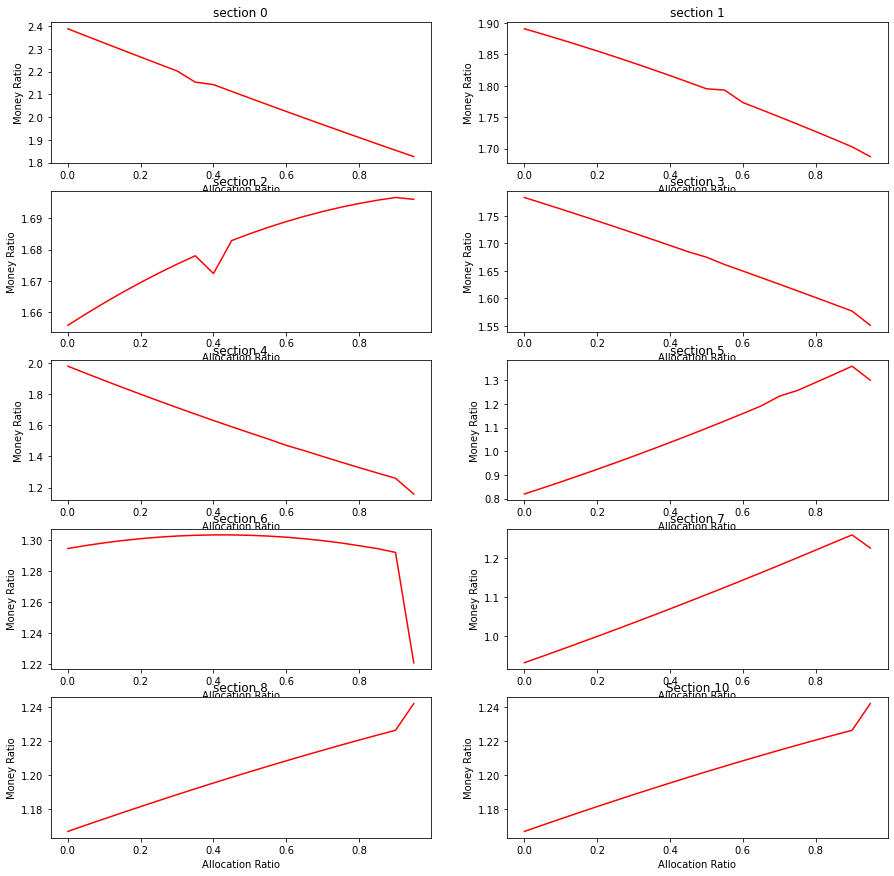

In [133]:
x_axis = [j for j in np.arange(0.0,1.0,0.05)]
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(521+i)
    plt.plot(x_axis,data_all[i],color = 'red')
    plt.title("section "+str(i))
    plt.xlabel('Allocation Ratio') 
    plt.ylabel('Money Ratio') 
plt.subplot(5,2,10)
plt.plot(x_axis,data_all[i],color = 'red')
plt.title("Section 10")
plt.xlabel('Allocation Ratio') 
plt.ylabel('Money Ratio') 

In [127]:
weights_best = [0,    0,      0.95,   0,    0,  
                0.9,  0.4,    0.9,    1,     1]
money_best = model(weights_best)

In [129]:
print(money_best)
print(money_best ** 0.1 - 1)

3.395832081237843
0.13004209259929844


In [ ]:
weights_try = [0,    0,      0.95,   0,    0,  
                0.9,  0.4,    0.9,    1,     1]
print(model(weights_try))

Text(0, 0.5, 'Money Ratio')

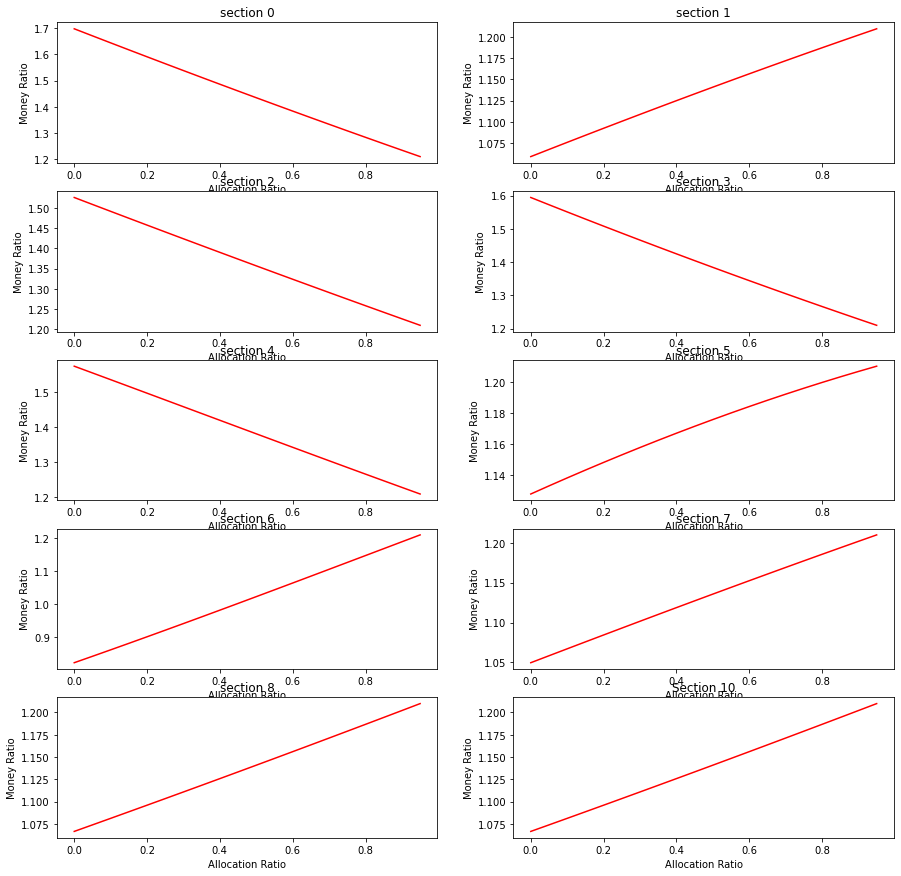

In [134]:
x_axis = [j for j in np.arange(0.0,1.0,0.05)]
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(521+i)
    plt.plot(x_axis,Data_all[i],color = 'red')
    plt.title("section "+str(i))
    plt.xlabel('Allocation Ratio') 
    plt.ylabel('Money Ratio') 
plt.subplot(5,2,10)
plt.plot(x_axis,Data_all[i],color = 'red')
plt.title("Section 10")
plt.xlabel('Allocation Ratio') 
plt.ylabel('Money Ratio') 

In [161]:
(5476/4000) ** 0.2

1.0648310086653294